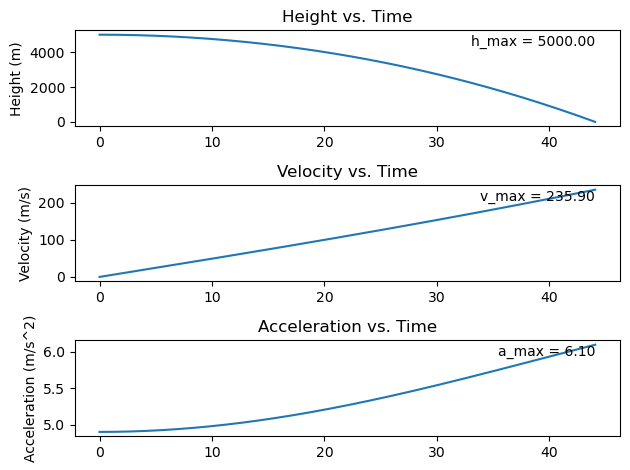

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def calculate_acceleration(mass, gravity, drag_coefficient, velocity, height):
  # Calculate the drag force
  drag_force = -drag_coefficient * velocity**2

  # Calculate the gravitational force at the current height
  gravitational_force = mass * gravity * (1 - height / 10000)

  # Calculate the net force
  net_force = drag_force + gravitational_force

  # Calculate the acceleration
  acceleration = net_force / mass

  return acceleration

# Define constants
mass = 3
gravity = 9.81
drag_coefficient = 2e-4
delta_time = 0.01
t_max = 5000
delta_t = 0.001 
h_max = 0

# Set the initial conditions
height = 5000
velocity = 0
num_steps = int(t_max / delta_t)
# Create lists to store the time, height, velocity, and acceleration values
time_values = []
height_values = []
velocity_values = []
acceleration_values = []

# Start a loop to iterate over the time steps
for i in range(num_steps):

  # Calculate the new acceleration
  acceleration = calculate_acceleration(mass, gravity, drag_coefficient, velocity, height)

  # Calculate the new velocity
  velocity = velocity + acceleration * delta_time

  # Calculate the new height
  height = height - velocity * delta_time
    
  # for maximum height reached which is the ground
  if height <= 0:
    break
    
  # Check if the velocity has stopped changing
  if velocity < 1e-6:
    break

  # Append the time, height, velocity, and acceleration values to the respective lists
  time_values.append(i * delta_time)
  height_values.append(height)
  velocity_values.append(velocity)
  acceleration_values.append(acceleration)

# Close the loop

# Maximum values obtained
a_max = max (acceleration_values)
v_max = max (velocity_values)
h_max = max (height_values)

# Create a Figure object
fig = plt.figure()

# Create subplots
ax1 = fig.add_subplot(311)
ax1.plot(time_values, height_values)
ax1.set_ylabel('Height (m)')
ax1.set_title('Height vs. Time')
ax1.text(time_values[-1], h_max, 'h_max = {:.2f}'.format(h_max), ha='right', va='top')

ax2 = fig.add_subplot(312)
ax2.plot(time_values, velocity_values)
ax2.set_ylabel('Velocity (m/s)')
ax2.set_title('Velocity vs. Time')
ax2.text(time_values[-1], v_max, 'v_max = {:.2f}'.format(v_max), ha='right', va='top')

ax3 = fig.add_subplot(313)
ax3.plot(time_values, acceleration_values)
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.set_title('Acceleration vs. Time')
ax3.text(time_values[-1], a_max, 'a_max = {:.2f}'.format(a_max), ha='right', va='top')

fig.tight_layout()

plt.show()

In this code, i started with a test code which was a test of a falling body without any drag force and a constant acceleration, and from there i started including the drag force.

I had issues with calculating the acceleration but then found out the right approach using some help online.

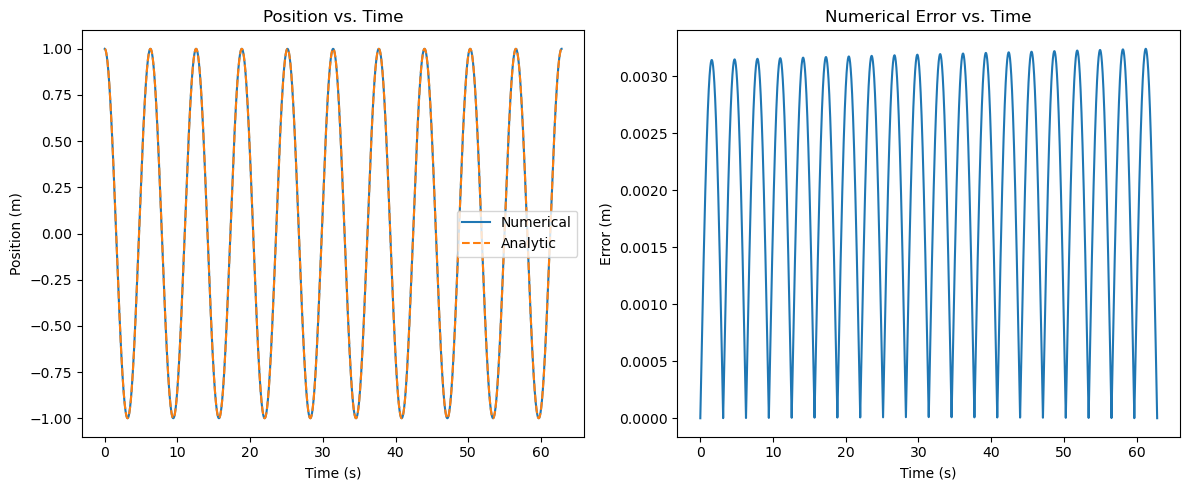

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
spring_constant = 1  # N/m
mass = 1  # kg
angular_frequency = np.sqrt(spring_constant / mass)  # Natural frequency
# rad/s

# Time array setup
period = 2 * np.pi / angular_frequency  # Period of one cycle
number_of_cycles = 10
number_of_points_per_cycle = 1000
time = np.linspace(0, number_of_cycles * period, number_of_cycles * number_of_points_per_cycle)
# s

# Time step (difference between successive time points)
delta_time = time[1] - time[0]  # s

# Arrays to store position and velocity
position = np.zeros_like(time)  # m
velocity = np.zeros_like(time)  # m/s

# Initial conditions
position[0] = 1  # m
velocity[0] = 0  # m/s

# Euler's method
def calculate_acceleration(position, spring_constant):

  return -spring_constant * position


def update_position_and_velocity(position, velocity, acceleration, delta_time):

  new_velocity = velocity + acceleration * delta_time
  new_position = position + new_velocity * delta_time

  return new_position, new_velocity


for i in range(1, len(time)):
  # Calculate the acceleration
  acceleration = calculate_acceleration(position[i - 1], spring_constant)

  # Update the position and velocity
  position[i], velocity[i] = update_position_and_velocity(position[i - 1], velocity[i - 1], acceleration, delta_time)

# Analytic solution
analytic_position = position[0] * np.cos(angular_frequency * time)
# m

# Error calculation
error = np.abs(position - analytic_position)
# m

# Plotting
figure = plt.figure(figsize=(12, 5))

# Plotting position vs time
subplot_1 = figure.add_subplot(1, 2, 1)
subplot_1.plot(time, position, label="Numerical")
subplot_1.plot(time, analytic_position, '--', label="Analytic")
subplot_1.set_xlabel("Time (s)")
subplot_1.set_ylabel("Position (m)")
subplot_1.set_title("Position vs. Time")
subplot_1.legend()

# Plotting error vs time
subplot_2 = figure.add_subplot(1, 2, 2)
subplot_2.plot(time, error)
subplot_2.set_xlabel("Time (s)")
subplot_2.set_ylabel("Error (m)")
subplot_2.set_title("Numerical Error vs. Time")

figure.tight_layout()

plt.show()